In [1]:
def latexify(Arr,decimal_places = 3, concise=False):
    '''
    Converts numpy arrays to Latex code.
    Courtesy of Charles Stoksik, Winter 2020.
    '''
    Arr = np.round(Arr,decimal_places) 

    #concise determines whether rows will be separated by newlines
    style = ' ' if concise else '\n'   
    
    if Arr.ndim == 1: #needed to handle vectors
        print('$$\\begin{bmatrix}')
        print(' \\\\{}'.format(style).join(map(str,Arr)))
        print('\\end{bmatrix}$$\n')
    else:
        print('$$\\begin{bmatrix}')
        print(' \\\\{}'.format(style).join([' & '.join(map(str,row)) for row in Arr]))
        print('\\end{bmatrix}$$\n')

In [15]:
import numpy as np 

A = np.genfromtxt('data/A.csv', delimiter=',')
Q = np.genfromtxt('data/Q.csv', delimiter=',')
b = np.genfromtxt('data/b.csv', delimiter=',')
R1 = np.genfromtxt('data/R1.csv', delimiter=',')

In [8]:
latexify(Q.T @ b)

$$\begin{bmatrix}
-1.318 \\
-0.181 \\
-0.201 \\
-0.539 \\
-0.076 \\
0.053
\end{bmatrix}$$



In [14]:
b1 = (Q.T @ b)[:4]
x_star = np.linalg.solve(R1, b1)
latexify(x_star)

$$\begin{bmatrix}
0.154 \\
1.233 \\
0.876 \\
-1.152
\end{bmatrix}$$



In [21]:
x_lsq = np.linalg.lstsq(A, b)[0]
latexify(x_lsq)

$$\begin{bmatrix}
0.154 \\
1.233 \\
0.876 \\
-1.152
\end{bmatrix}$$



In [27]:
A = np.array([[1,0], [2,7], [3,5]])
np.linalg.eig(A.T@A)

(array([ 2.27470791, 85.72529209]),
 array([[-0.92708909, -0.37484105],
        [ 0.37484105, -0.92708909]]))

In [31]:
latexify(np.linalg.svd(A)[2])

$$\begin{bmatrix}
-0.375 & -0.927 \\
0.927 & -0.375
\end{bmatrix}$$



In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]
 [1.420e+01 1.760e+00 2.450e+00 1.520e+01 1.120e+02 3.270e+00 3.390e+00
  3.400e-01 1.970e+00 6.750e+00 1.050e+00 2.850e+00 1.450e+03]
 [1.439e+01 1.870e+00 2.450e+00 1.460e+01 9.600e+01 2.500e+00 2.520e+00
  3.000e-01 1.980e+00 5.250e+00 1.020e+00 3.580e+00 1.290e+03]
 [1.406e+01 2.150e+00 2.610e+00 1.760e+01 1.210e+02 2.6

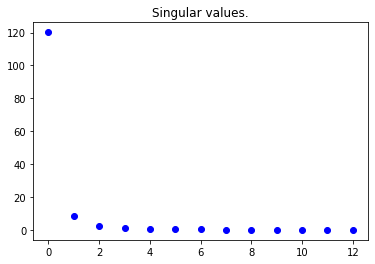

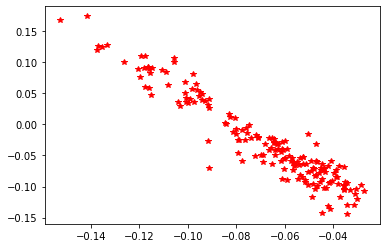

In [39]:
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
print(X[0:10,:])
y = wine.target # The data labels, either 1,2, or 3.
print(X.shape)
mu = np.mean(X, axis=1, keepdims=True) # keepdims ensures that mu is a (150,1) array, instead of a (150,) array.
print(mu.shape)
X_temp = X - mu
X_tilde = X_temp/np.max(X_temp,axis = 0)
print(X_tilde[0:10,:])
#X_tilde = X - mu  # Note that Python handles the broadcasting well! This is because of the keepdims
U,S,Vh = np.linalg.svd(X_tilde)
plt.plot(S,'bo')
plt.title('Singular values.')
plt.show()
Loading_on_sing_vec_1 = U[:,0]
Loading_on_sing_vec_2 = U[:,1]
plt.plot(Loading_on_sing_vec_1,Loading_on_sing_vec_2,'r*')
plt.show()

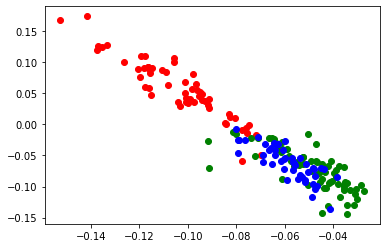

In [40]:
colors = ['red', 'green', 'blue']
for i in range(0,3):
    plt.scatter(Loading_on_sing_vec_1[y == i],Loading_on_sing_vec_2[y == i],color = colors[i])